<a href="https://colab.research.google.com/github/Goyo0117970/TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFORME:
El siguiente Análisis busca identificar posibles factores de deserción de clientes de la Empresa Telecom X, ya que muchos han decidio prescindir de nuestros servicios, lo cual es preocupante para la Gerencia, por este motivo hacen entrega de archivo de base de datos para realizar el análisis correspondiente del caso y detectar el o los posibles motivos de estas decisiones negativas que afectan de manera directa a esta empresa. Esta base de datos maneja los siguientes campos:

Diccionario de datos

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

##📌 Extracción

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
dato = requests.get(url)

##🔧 Transformación

In [4]:
data = dato.json()
df = pd.json_normalize(data)
#print(df.head())
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
print(df.isnull().sum())

print(df.describe())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64
       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly
count             7267.000000      7267.000000              7267.000000
mean                 0.162653        32.346498                64.720098
std                  0.369074        24.571773                30.129572
min                  0.000000         0.000000  

In [7]:
df[df['Churn'].isnull()]              # Valores nulos
df[df['Churn'].str.strip() == '']     # Cadenas vacías

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [8]:
df['Churn'] = df['Churn'].astype(str).str.strip().str.title()

In [9]:
df = df[df['Churn'].isin(['Yes', 'No'])]

In [10]:
print(df['Churn'].unique())

['No' 'Yes']


In [12]:
sns.set_theme(style='ticks', context='talk', palette='tab10')

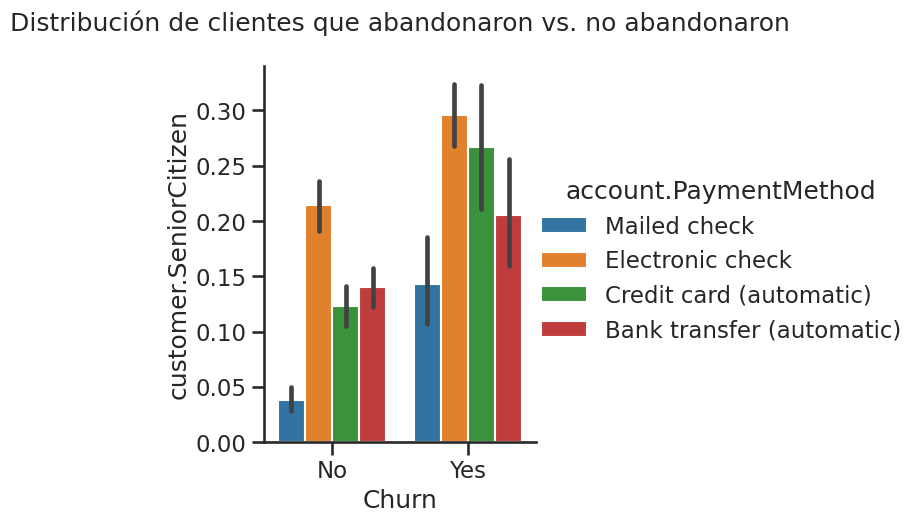

In [20]:
sns.catplot(x='Churn', y='customer.SeniorCitizen', data=df, kind='bar',hue='account.PaymentMethod')
plt.title('Distribución de clientes que abandonaron vs. no abandonaron\n')
plt.show()

In [18]:
print(df['customer.SeniorCitizen'].unique())

[0 1]


In [19]:
print(df['customer.SeniorCitizen'].value_counts())

customer.SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [21]:
print(df[['customer.SeniorCitizen', 'Churn']].isnull().sum())

customer.SeniorCitizen    0
Churn                     0
dtype: int64


In [32]:
df['customer.SeniorCitizen'].head()

,customer.SeniorCitizen
0,0
1,0
2,0
3,1
4,1


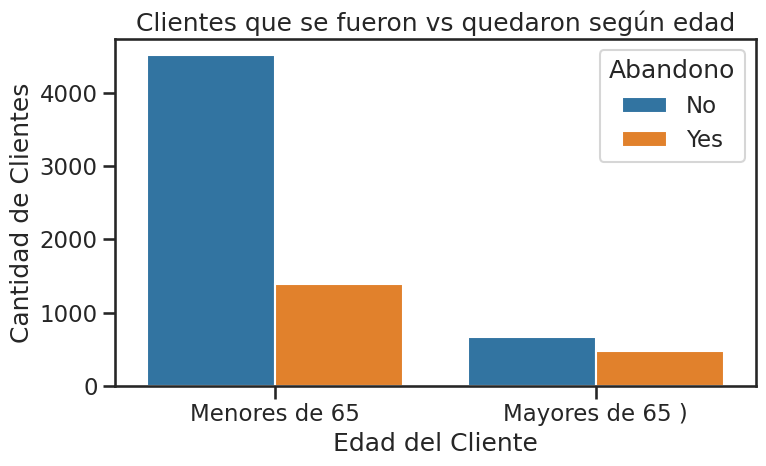

Tasa de churn global (Yes vs No):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Tasa de churn para clientes Senior (>= 65 años):
       Porcentaje
Churn            
No      58.318739
Yes     41.681261

Tasa de churn para clientes No Senior (< 65 años):
       Porcentaje
Churn            
No      76.393832
Yes     23.606168

En total abandonaron: 26.54% Clientes
Churn solo Senior (>= 65 años): 41.68%
Churn solo No Senior (< 65 años): 23.61%
En total abandonaron: 26.54% clientes



In [37]:
grouped = df.groupby(['customer.SeniorCitizen', 'Churn']).size().reset_index(name='Cantidad')

# Convertir 0/1 a etiquetas más claras
grouped['Edad'] = grouped['customer.SeniorCitizen'].map({0: 'Menores de 65', 1: 'Mayores de 65 )'})

# Gráfico de barras agrupadas
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Edad', y='Cantidad', hue='Churn', palette='tab10')

plt.title('Clientes que se fueron vs quedaron según edad')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Edad del Cliente')
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

# Porcentaje
# 1) Tasa de churn global
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Tasa de churn global (Yes vs No):")
print(churn_rate)
print()

# 2) Filtrar clientes Senior (customer.SeniorCitizen == 1)
senior = df[df['customer.SeniorCitizen'] == 1]

# 2.1) Dentro de ese subconjunto, calcular churn (% Yes vs No)
senior_churn = senior['Churn'].value_counts(normalize=True) * 100
print("Tasa de churn para clientes Senior (>= 65 años):")
print(senior_churn.to_frame(name='Porcentaje'))
print()

# 3) Filtrar clientes No Senior (customer.SeniorCitizen == 0)
no_senior = df[df['customer.SeniorCitizen'] == 0]

# 3.1) Dentro de ese subconjunto, calcular churn (% Yes vs No)
no_senior_churn = no_senior['Churn'].value_counts(normalize=True) * 100
print("Tasa de churn para clientes No Senior (< 65 años):")
print(no_senior_churn.to_frame(name='Porcentaje'))
print()

# 4) Si solo quieres el porcentaje de churn “Yes” en cada grupo:
percent_churn_global = (df['Churn'] == 'Yes').mean() * 100
percent_senior_churn = (senior['Churn'] == 'Yes').mean() * 100
percent_no_senior_churn = (no_senior['Churn'] == 'Yes').mean() * 100

print(f"En total abandonaron: {percent_churn_global:.2f}% Clientes")
print(f"Churn solo Senior (>= 65 años): {percent_senior_churn:.2f}%")
print(f"Churn solo No Senior (< 65 años): {percent_no_senior_churn:.2f}%")

#############
# 1) Porcentaje de churn global (solo “Yes”)
abandonaron = (df['Churn'] == 'Yes').mean() * 100
print(f"En total abandonaron: {abandonaron:.2f}% clientes")
print()



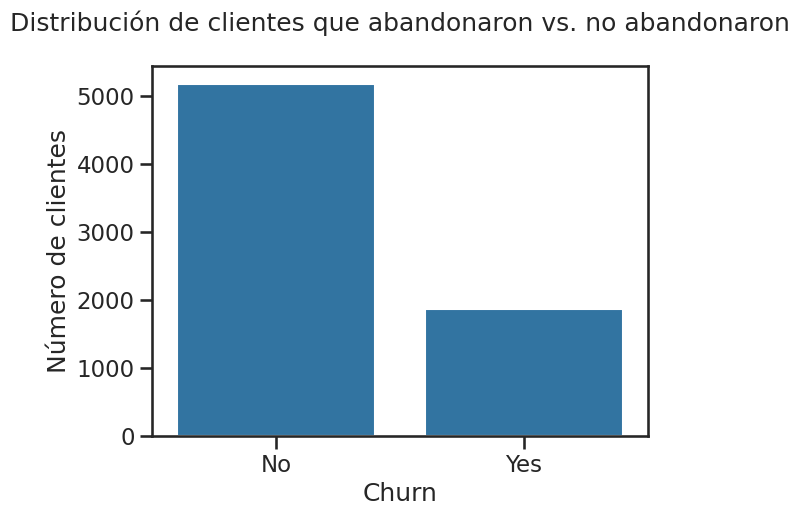

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [13]:
sns.countplot(data=df, x='Churn')
plt.title('Distribución de clientes que abandonaron vs. no abandonaron\n')
plt.ylabel('Número de clientes')
plt.show()

# Porcentaje
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

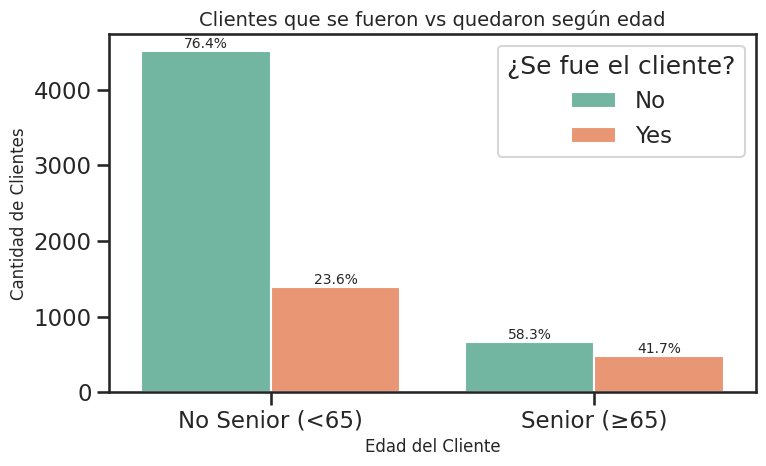


Porcentajes de Churn por grupo de edad:
**************************************************
Edad                 Churn      Cantidad % sobre total edad
**************************************************
No Senior (<65)      No             4508           76.39%
No Senior (<65)      Yes            1393           23.61%
Senior (≥65)         No              666           58.32%
Senior (≥65)         Yes             476           41.68%
**************************************************


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# (1) Agrupar datos por SeniorCitizen y Churn
grouped = df.groupby(['customer.SeniorCitizen', 'Churn']).size().reset_index(name='Cantidad')

# (2) Mapear 0/1 a etiquetas legibles
grouped['Edad'] = grouped['customer.SeniorCitizen'].map({
    0: 'No Senior (<65)',
    1: 'Senior (≥65)'
})

# (3) Calcular totales por grupo de edad
totales_por_edad = grouped.groupby('Edad')['Cantidad'].sum().rename('TotalEdad').reset_index()

# (4) Unir totales de vuelta para calcular porcentaje
grouped = grouped.merge(totales_por_edad, on='Edad')
grouped['Porcentaje'] = (grouped['Cantidad'] / grouped['TotalEdad'] * 100).round(2)

# (5) Graficar barras (conteo)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=grouped,
    x='Edad',
    y='Cantidad',
    hue='Churn',
    palette='Set2'
)
plt.title('Clientes que se fueron vs quedaron según edad', fontsize=14)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xlabel('Edad del Cliente', fontsize=12)
plt.legend(title='¿Se fue el cliente?', loc='best')
plt.tight_layout()

# (6) Anotar cada barra con su porcentaje
#    Recorremos cada rectángulo en el barplot para colocar el texto
for p in plt.gca().patches:
    alto = p.get_height()
    x_centro = p.get_x() + p.get_width() / 2
    # Encontrar fila correspondiente en 'grouped' para ese parche
    #    Nota: seaborn dibuja primero todas las barras de Churn='No', luego Churn='Yes',
    #    y respeta el orden de las categorías en 'Edad'. Pero para simplificar,
    #    podemos buscar por coincidencia de x e y en el DataFrame.
    edad_cat = p.get_x() + p.get_width() / 2  # no lo necesitamos directamente, usaremos un match manual
    # En su lugar, mejor accedemos a los datos de manera indexada
    #   Como seaborn dibuja por orden: itera sobre cada fila de 'grouped' según hue y x,
    #   podemos usar un contador manual:
    pass

# Como el mapeo exacto parche → fila puede ser delicado, usaremos un bucle más directo:
# Vamos a iterar sobre los grupos en el mismo orden en que seaborn los dibuja:
#  Primero todas las barras para Churn="No" en cada categoría de 'Edad' en orden,
#  luego todas las barras para Churn="Yes" en cada categoría de 'Edad'.

# Obtener lista de categorías en el mismo orden del plot
edades_ord = grouped['Edad'].unique().tolist()
hue_ord = grouped['Churn'].unique().tolist()

# Si seaborn ha reordenado automáticamente, podemos forzar el orden:
edades_ord = ['No Senior (<65)', 'Senior (≥65)']
hue_ord = ['No', 'Yes']

# Contador para recorrer el DataFrame en ese mismo orden
idx = 0
for churn_cat in hue_ord:
    for edad_cat in edades_ord:
        fila = grouped[(grouped['Edad'] == edad_cat) & (grouped['Churn'] == churn_cat)]
        if not fila.empty:
            cantidad = int(fila['Cantidad'].values[0])
            porcentaje = float(fila['Porcentaje'].values[0])
            # Ubicar parche correspondiente:
            p = plt.gca().patches[idx]
            alto = p.get_height()
            x_centro = p.get_x() + p.get_width() / 2
            plt.text(
                x_centro,
                alto + 0.5,
                f"{porcentaje:.1f}%",
                ha='center',
                va='bottom',
                fontsize=10
            )
            idx += 1

plt.show()

# (7) Imprimir tabla de porcentajes debajo del gráfico
print("\nPorcentajes de Churn por grupo de edad:")
print("*" * 50)
print(f"{'Edad':<20} {'Churn':<10} {'Cantidad':>8} {'% sobre total edad':>15}")
print("*" * 50)
for _, row in grouped.iterrows():
    print(f"{row['Edad']:<20} {row['Churn']:<10} {int(row['Cantidad']):>8} {row['Porcentaje']:>15.2f}%")
print("*" * 50)


In [ ]:
sns.boxplot(data=df, x='Churn', y='customer.tenure')
plt.title('Duración del contrato vs Churn')
plt.grid()
plt.show()

sns.boxplot(data=df, x='Churn', y='account.Charges.Monthly')
plt.title('Cargo mensual vs Churn')
plt.show()

##📊 Carga y análisis



##📄Informe final